# Diagnostics of wavenumber scan

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Utils.dispersionSolver import solveDispersionHybrid
from Utils.matrixAssembly import matrixAssembly
from Utils.createBasis import createBasis

In [3]:
# ... import simulation data
data1 = np.loadtxt('Results/01_WavenumberScan/simulation_data_T=400_k=1.5.txt')
data2 = np.loadtxt('Results/01_WavenumberScan/simulation_data_T=400_k=1.75.txt')

print('Data 1 and 2 imported!')

data3 = np.loadtxt('Results/01_WavenumberScan/simulation_data_T=400_k=2.0.txt')
data4 = np.loadtxt('Results/01_WavenumberScan/simulation_data_T=400_k=2.25.txt')

print('Data 1 and 2 imported!')

data5 = np.loadtxt('Results/01_WavenumberScan/simulation_data_T=400_k=2.5.txt')
data6 = np.loadtxt('Results/01_WavenumberScan/simulation_data_T=400_k=2.75.txt')

print('Data 5 and 6 imported!')

data7 = np.loadtxt('Results/01_WavenumberScan/simulation_data_T=400_k=3.0.txt')
# ...

Data 1 and 2 imported!
Data 1 and 2 imported!
Data 5 and 6 imported!


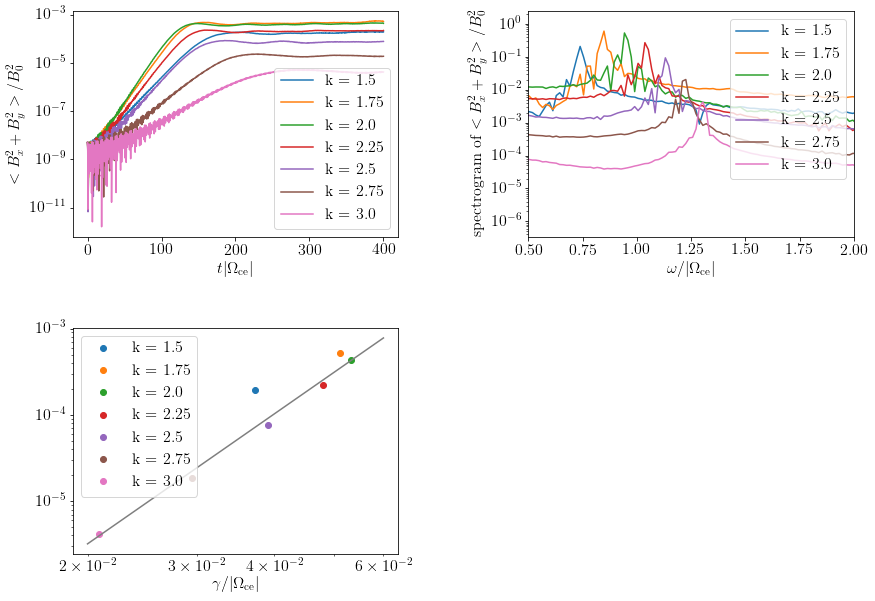

In [21]:
plt.rc('text',usetex = True)
plt.rc('font',family = 'serif')
plt.rcParams.update({'font.size': 16})
plt.rc('xtick',labelsize = 16)
plt.rc('ytick',labelsize = 16)



# ... get simulation parameters
pa = data1[0]

eps0  = pa[0]
mu0   = pa[1]
c     = pa[2]
qe    = pa[3]
me    = pa[4]
B0z   = pa[5]
wce   = pa[6]
wpe   = pa[7]
nuh   = pa[8]
nh    = pa[9]
wpar  = pa[10]
wperp = pa[11]
k     = pa[12]
ini   = np.int(pa[13])
amp   = pa[14]
eps   = pa[15]
Lz    = pa[16]
Nz    = np.int(pa[17])
T     = pa[18]
dt    = pa[19]
p     = np.int(pa[20])
Lv    = pa[21]
Nv    = np.int(pa[22])
Np    = np.int(pa[23])
# ...



# ... additional parameters 
Nb = Nz
s = 6
ordering = 0
Nt = np.int(T/dt)
# ...



# ... spatial discretization parameters
dz = Lz/Nz
zj = np.linspace(0,Lz,Nz+1)
# ...


# ... create B-spline basis and compute mass matrix
basis,N,quad_points,weights = createBasis(Lz,Nz,p)
M = matrixAssembly(basis,p,Nz,weights,quad_points)[0]
# ...




# ... get simulation data ej,bj,ycj and yhj
def getData(data,ordering):
    if ordering == 0:

        uj = data[1:,0:s*Nb]
        yhj = data[1:,s*Nb:8*Nb]

        ejx = uj[:,0::6]
        ejy = uj[:,1::6]
        bjx = uj[:,2::6]
        bjy = uj[:,3::6]
        ycjx = uj[:,4::6]
        ycjy = uj[:,5::6]
        yhjx = yhj[:,0::2]
        yhjy = yhj[:,1::2]
        tn = data[1:,-1]
        Nt = len(tn) - 1

    elif ordering == 1:

        ej = data[1:Nt+2,0:2*Nb]
        bj = data[1:Nt+2,2*Nb:4*Nb]
        ycj = data[1:Nt+2,4*Nb:6*Nb]
        yhj = data[1:Nt+2,6*Nb:8*Nb]

        ejx = ej[:,0::2]
        ejy = ej[:,1::2]
        bjx = bj[:,0::2]
        bjy = bj[:,1::2]
        ycjx = ycj[:,0::2]
        ycjy = ycj[:,1::2]
        yhjx = yhj[:,0::2]
        yhjy = yhj[:,1::2] 
        tn = data[1:Nt+2,-1]
        Nt = len(tn) - 1
        
    return ejx,ejy,bjx,bjy,ycjx,ycjy,yhjx,yhjy,tn,Nt



ks = np.array([1.5,1.75,2.0,2.25,2.5,2.75,3.0])


ejx = np.zeros((Nt+1,Nb,len(ks)))
ejy = np.zeros((Nt+1,Nb,len(ks)))
bjx = np.zeros((Nt+1,Nb,len(ks)))
bjy = np.zeros((Nt+1,Nb,len(ks)))
ycjx = np.zeros((Nt+1,Nb,len(ks)))
ycjy = np.zeros((Nt+1,Nb,len(ks)))
yhjx = np.zeros((Nt+1,Nb,len(ks)))
yhjy = np.zeros((Nt+1,Nb,len(ks)))
tn = np.zeros((Nt+1,len(ks)))

ejx[:,:,0],ejy[:,:,0],bjx[:,:,0],bjy[:,:,0],ycjx[:,:,0],ycjy[:,:,0],yhjx[:,:,0],yhjy[:,:,0],tn[:,0],Nt = getData(data1,ordering)
ejx[:,:,1],ejy[:,:,1],bjx[:,:,1],bjy[:,:,1],ycjx[:,:,1],ycjy[:,:,1],yhjx[:,:,1],yhjy[:,:,1],tn[:,1],Nt = getData(data2,ordering)
ejx[:,:,2],ejy[:,:,2],bjx[:,:,2],bjy[:,:,2],ycjx[:,:,2],ycjy[:,:,2],yhjx[:,:,2],yhjy[:,:,2],tn[:,2],Nt = getData(data3,ordering)
ejx[:,:,3],ejy[:,:,3],bjx[:,:,3],bjy[:,:,3],ycjx[:,:,3],ycjy[:,:,3],yhjx[:,:,3],yhjy[:,:,3],tn[:,3],Nt = getData(data4,ordering)
ejx[:,:,4],ejy[:,:,4],bjx[:,:,4],bjy[:,:,4],ycjx[:,:,4],ycjy[:,:,4],yhjx[:,:,4],yhjy[:,:,4],tn[:,4],Nt = getData(data5,ordering)
ejx[:,:,5],ejy[:,:,5],bjx[:,:,5],bjy[:,:,5],ycjx[:,:,5],ycjy[:,:,5],yhjx[:,:,5],yhjy[:,:,5],tn[:,5],Nt = getData(data6,ordering)
ejx[:,:,6],ejy[:,:,6],bjx[:,:,6],bjy[:,:,6],ycjx[:,:,6],ycjy[:,:,6],yhjx[:,:,6],yhjy[:,:,6],tn[:,6],Nt = getData(data7,ordering)    
# ...






# ... solve the dispersion relation for a fixed k to get ocillation frequency and growth rate 
omega = np.zeros(len(ks),dtype = complex)
omega_r = np.zeros(len(ks))
gamma = np.zeros(len(ks))

for i in range(0,len(ks)):
    omega[i] = solveDispersionHybrid(ks[i],+1,c,wce,wpe,wpar,wperp,nuh,0.5 + 0.04j,1e-7,100)[0]
    omega_r[i] = np.real(omega[i])
    gamma[i] = np.imag(omega[i])
# ...





# ... compute averaged quadratic magnetic field
mean_Bx2 = np.zeros((Nt+1,len(ks)))
mean_B2 = np.zeros((Nt+1,len(ks)))

for i in range(0,len(ks)):
    for j in range(0,Nt+1):
        mean_Bx2[j,i] = 1/Lz*np.dot(bjx[j,:,i],np.dot(M,bjx[j,:,i]))
        mean_B2[j,i] = 1/Lz*(np.dot(bjx[j,:,i],np.dot(M,bjx[j,:,i])) + np.dot(bjy[j,:,i],np.dot(M,bjy[j,:,i])))
# ...

      
    
# ... find maxima of averaged magnetic field
saturation = np.zeros(len(ks))

for i in range(0,len(ks)):
    #saturation[i] = np.max(mean_B2[:,i])
    saturation[i] = mean_B2[-1,i]
# ...
    
                      
# ... compute ffts for frequency analysis  
spec = np.zeros((Nt+1,len(ks)),dtype = complex)
for i in range(0,len(ks)):
    spec[:,i] = np.fft.fft(mean_Bx2[:,i])
    spec[:,i] = np.fft.fftshift(spec[:,i])
    
w = np.linspace(0,Nt,Nt+1) - Nt/2
w = 2*np.pi*w/T
# ...

 
                       
# ... plot results
f1 = plt.figure()
f1.set_figheight(10)
f1.set_figwidth(14)
plt.subplots_adjust(wspace = 0.4, hspace = 0.4)

tend = np.array([170,140,140,140,150,170,250])

plt.subplot(221)
for i in range(0,len(ks)):
    plt.semilogy(tn[:,i],mean_B2[:,i],label = 'k = ' + str(ks[i]))
    t2 = np.linspace(0,tend[i],100)
    #plt.semilogy(t2,1.00e-9*np.exp(t2*gamma[i]*2),'k--')
    
plt.xlabel(r'$t |\Omega_\mathrm{ce}|$')
plt.ylabel(r'$<B_x^2+B_y^2>/B_0^2$')
plt.legend()



plt.subplot(222)
for i in range(0,len(ks)):
    plt.semilogy(w,np.abs(spec[:,i]),label = 'k = ' + str(ks[i]))
    #plt.plot(np.ones(20)*2*omega_r,np.linspace(0,6e-5,20),label = 'expected real frequency')

plt.xlim((0.5,2))
plt.xlabel(r'$\omega / |\Omega_\mathrm{ce}|$')
plt.ylabel(r'spectrogram of $<B_x^2+B_y^2>/B_0^2$')
plt.legend(loc = 1)


plt.subplot(223)
for i in range(len(ks)):
    plt.loglog(gamma[i],saturation[i],'o',label = 'k = ' + str(ks[i]))
    
gammas = np.linspace(0.02,0.06,20)
plt.loglog(gammas,1000*gammas**5)
plt.legend()
plt.xlabel(r'$\gamma / |\Omega_\mathrm{ce}|$')
# ...

plt.savefig('/home/florian/Schreibtisch/Masterarbeit/05_Präsentationen/01_Summary/01_Figures/WavenumberScan.pdf',bbox_inches = 'tight')